## Reliability Statistics Notebook

In [ ]:
# For use on google colab
# Comment out and use pipenv for local use
!pip install 'git+https://github.com/sanjaymjoshi/relistats.git#egg=relistats' 


: 

In [1]:

from relistats.binomial import assurance, confidence, reliability, reliability_optim
from relistats.binomial import _wilson_lower, _wilson_lower_corrected
import matplotlib.pyplot as plt
from tabulate import tabulate

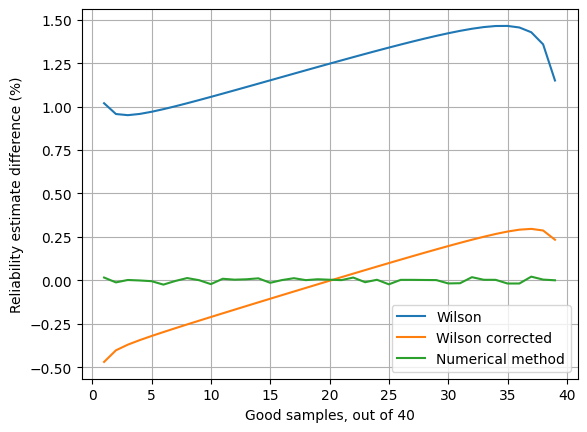

In [2]:
#@title Accuracy of Closed Form Reliability Computations { vertical-output: true }
n = 40 #@param {type:"integer"}



rmat = []
all_ns = range(1,n)
for ns in all_ns:
  r = ns/n
  c = confidence(n, n-ns, r)
  rw = _wilson_lower(r, n, c)
  rwc = _wilson_lower_corrected(r, n, c)
  roptim = reliability_optim(n, n-ns, c)

  rmat.append([(rw-r)*100, (rwc-r)*100, (roptim-r)*100 ])

plt.plot(all_ns, rmat)
  
plt.legend(['Wilson', 'Wilson corrected', 'Numerical method'])
plt.xlabel(f'Good samples, out of {n}')
plt.ylabel('Reliability estimate difference (%)')
#plt.title('Accuracy of Wilson Score Interval Methods')
plt.grid()
plt.show()



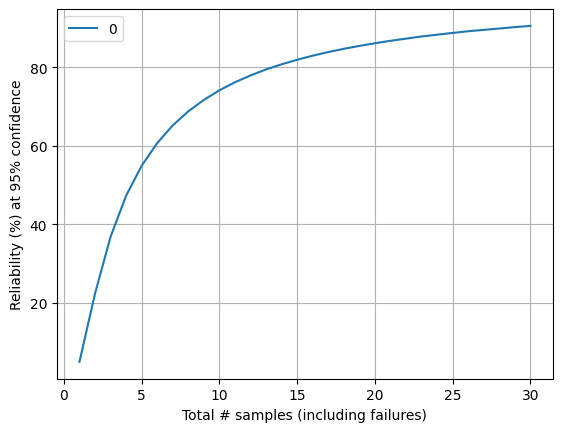

\begin{tabular}{rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\hline
    &   1 &    2 &    3 &    4 &    5 &    6 &    7 &    8 &    9 &   10 &   11 &   12 &   13 &   14 &   15 &   16 &   17 &   18 &   19 &   20 &   21 &   22 &   23 &   24 &   25 &   26 &   27 &   28 &   29 &   30 \\
\hline
  0 & 5.0 & 22.4 & 36.8 & 47.3 & 54.9 & 60.7 & 65.2 & 68.8 & 71.7 & 74.1 & 76.2 & 77.9 & 79.4 & 80.7 & 81.9 & 82.9 & 83.8 & 84.7 & 85.4 & 86.1 & 86.7 & 87.3 & 87.8 & 88.3 & 88.7 & 89.1 & 89.5 & 89.8 & 90.2 & 90.5 \\
\hline
\end{tabular}


In [3]:
#@title Reliability computations { vertical-output: true }
n_start = 1 #@param {type:"integer"}
n_end = 30 #@param {type:"integer"}
n_step = 1 #@param {type:"integer"}
f_start = 0 #@param {type:"integer"}
f_end = 0 #@param {type:"integer"}
f_step = 1 #@param {type:"integer"}
c = 95 #@param {type:"integer"}

N = range(n_start, n_end+n_step, n_step) # number of samples
F = range(f_start, f_end+f_step, f_step) # number of failures
all_a = []
for f in F:
  aa =  [100 *reliability(n, f, c/100) for n in N]
  plt.plot(N, aa)
  all_a.append(aa)

plt.ylabel(f'Reliability (%) at {c}% confidence')
plt.xlabel('Total # samples (including failures)')
#plt.title('Confidence Level for Number of Failures')
plt.legend(F)
plt.grid()
plt.show()

print(tabulate(all_a, headers=N, tablefmt='latex', floatfmt=".1f", showindex="always"))

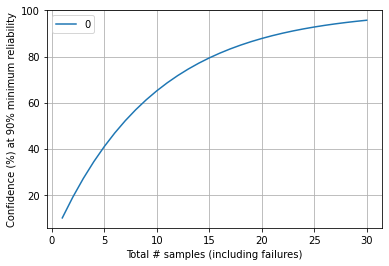

\begin{tabular}{rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\hline
    &    1 &    2 &    3 &    4 &    5 &    6 &    7 &    8 &    9 &   10 &   11 &   12 &   13 &   14 &   15 &   16 &   17 &   18 &   19 &   20 &   21 &   22 &   23 &   24 &   25 &   26 &   27 &   28 &   29 &   30 \\
\hline
  0 & 10.0 & 19.0 & 27.1 & 34.4 & 41.0 & 46.9 & 52.2 & 57.0 & 61.3 & 65.1 & 68.6 & 71.8 & 74.6 & 77.1 & 79.4 & 81.5 & 83.3 & 85.0 & 86.5 & 87.8 & 89.1 & 90.2 & 91.1 & 92.0 & 92.8 & 93.5 & 94.2 & 94.8 & 95.3 & 95.8 \\
\hline
\end{tabular}


In [ ]:
#@title Confidence calculations { vertical-output: true }
n_start = 1 #@param {type:"integer"}
n_end = 30 #@param {type:"integer"}
n_step = 1 #@param {type:"integer"}
f_start = 0 #@param {type:"integer"}
f_end = 0 #@param {type:"integer"}
f_step = 1 #@param {type:"integer"}
reli_percent = 90 #@param {type:"integer"}

N = range(n_start, n_end+n_step, n_step) # number of samples
F = range(f_start, f_end+f_step, f_step) # number of failures
r = reli_percent/100 # reliability
all_c = []
for f in F:
  cc =  [100 *confidence(n, f, r) for n in N]
  plt.plot(N, cc)
  all_c.append(cc)

plt.ylabel(f'Confidence (%) at {reli_percent}% minimum reliability')
plt.xlabel('Total # samples (including failures)')
#plt.title('Confidence Level for Number of Failures')
plt.legend(F)
plt.grid()
plt.show()

print(tabulate(all_c, headers=N, tablefmt='latex', floatfmt=".1f", showindex="always"))

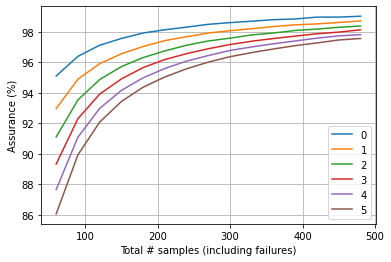

\begin{tabular}{rrrrrrrrrrrrrrrr}
\hline
    &   60 &   90 &   120 &   150 &   180 &   210 &   240 &   270 &   300 &   330 &   360 &   390 &   420 &   450 &   480 \\
\hline
  0 & 95.1 & 96.4 &  97.1 &  97.6 &  97.9 &  98.1 &  98.3 &  98.5 &  98.6 &  98.7 &  98.8 &  98.8 &  99.0 &  99.0 &  99.0 \\
  1 & 93.0 & 94.9 &  95.9 &  96.6 &  97.0 &  97.4 &  97.7 &  97.9 &  98.1 &  98.2 &  98.3 &  98.5 &  98.5 &  98.6 &  98.7 \\
  2 & 91.1 & 93.5 &  94.9 &  95.7 &  96.3 &  96.7 &  97.1 &  97.4 &  97.6 &  97.8 &  97.9 &  98.1 &  98.2 &  98.3 &  98.4 \\
  3 & 89.3 & 92.3 &  93.9 &  94.9 &  95.7 &  96.2 &  96.6 &  96.9 &  97.2 &  97.4 &  97.6 &  97.7 &  97.9 &  98.0 &  98.1 \\
  4 & 87.7 & 91.1 &  93.0 &  94.2 &  95.0 &  95.6 &  96.1 &  96.4 &  96.8 &  97.0 &  97.2 &  97.4 &  97.6 &  97.7 &  97.8 \\
  5 & 86.1 & 89.9 &  92.1 &  93.4 &  94.4 &  95.0 &  95.6 &  96.0 &  96.4 &  96.6 &  96.9 &  97.1 &  97.3 &  97.5 &  97.6 \\
\hline
\end{tabular}


In [9]:
#@title Assurance computations { vertical-output: true }
n_start = 60 #@param {type:"integer"}
n_end = 480 #@param {type:"integer"}
n_step = 30 #@param {type:"integer"}
f_start = 0 #@param {type:"integer"}
f_end = 5 #@param {type:"integer"}
f_step = 1 #@param {type:"integer"}

N = range(n_start, n_end+n_step, n_step) # number of samples
F = range(f_start, f_end+f_step, f_step) # number of failures
all_a = []
for f in F:
  aa =  [100 *assurance(n, f) for n in N]
  plt.plot(N, aa)
  all_a.append(aa)

plt.ylabel(f'Assurance (%)')
plt.xlabel('Total # samples (including failures)')
#plt.title('Confidence Level for Number of Failures')
plt.legend(F)
plt.grid()
plt.show()

print(tabulate(all_a, headers=N, tablefmt='latex', floatfmt=".1f", showindex="always"))

https://www.researchgate.net/publication/296649442_Attribute_Reliability_and_the_Success_Run_A_Review